Recall! You must copy this notebook to your own Drive before using!

# **Lab 11: Classification #2**


# How Classification Comes to Be...

- First, let's import the "credit" dataset by installing the ISLP module and learning how to load directly from our package...
  - [Link to package](https://github.com/intro-stat-learning/ISLP): Always research the packages you install!
  - [Documentation](https://intro-stat-learning.github.io/ISLP/datasets/Credit.html) on how to use the ISLP package!

### Data Dictionary:
`Income`: Income in $1,000’s

`Limit`: Credit limit

`Rating`: Credit rating

`Cards`: Number of credit cards

`Age`: Age in years

`Education`: Education in years

`Own`: A factor with levels No and Yes indicating whether the individual owns a home

`Student`: A factor with levels No and Yes indicating whether the individual is a student

`Married`: A factor with levels No and Yes indicating whether the individual is married

`Region`: A factor with levels East, South, and West indicating the individual’s geographical location

`Balance`: Average credit card balance in $



# Prereq
- pip install the ISLP package, restart your runtime, import the ISLP module, and load the "default" dataset as `default`.

In [1]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.7/727.7 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 30.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=82a02fa75b24ca3ef68f79fbf1fce30470caf77a4cd9b0b9f92fd42119a8b4c2
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstall

# Question 1: Creating Your Own Classification Dataset

- import the `load_data` function from the `ISLP` package
- load the "Credit" dataset to a variable `credit`
- import the `seaborn` package as `sns` and run a histogram on the "Balance" column
- when running the `histplot` function, insert and run the argument `bins=50`

<Axes: xlabel='Balance', ylabel='Count'>

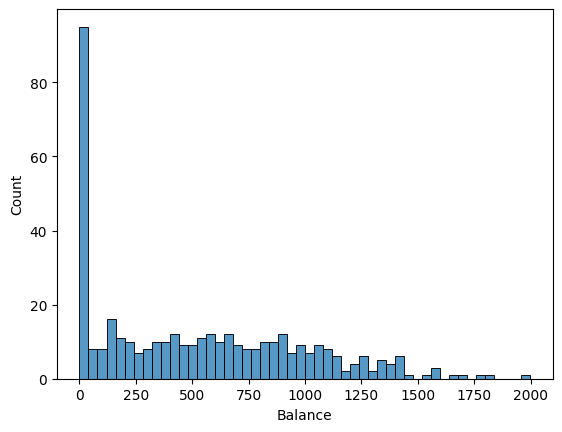

In [8]:
# libraries & dataset
import seaborn as sns
from ISLP import load_data

credit = load_data("Credit")

sns.histplot(data=credit, x="Balance", bins=50)

# Question 2: Feature engineering

Sometimes to create your classification dataset, you need to create your own `target` variable. Let's predict whether, based on some independent variables, an account balance (`Balance`) is likely to be above $50

- run a conditional statement akin to what we learned in class (remember this was the class code: `(y_pred >= threshold).astype(int)` ) and assign the result to the variable `boolean`.

 - For this problem you'll need to replace `y_pred` with the `credit['Balance`] column and threshold with the amount of balance the data should be above or equal to...

- Create a new column in the `credit` dataframe called `target` and assign `boolean` to it.


In [15]:
boolean = (credit['Balance'] >= 50).astype(int)
credit['target'] = boolean

In [16]:
credit.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,target
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1


# Question 3: Logistic Regression

- create a new variable `is_married` that assigns 'Yes' to 1 and 'No' to 0.
- create a train-test split of our data using `sklearn`
 - in your train-test-split ensure that the random seed is assigned an integer, that shuffle is on, and that the test set is .13
- Import the `statsmodels.api`
- Features:
  - Your training set of `features` should contain the following variables: `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, `is_married`
  - add a constant to your training set
- Target
  - Assign your target to be the column `target`
- Run and fit the `Logit` function upon your `X_train` and `y_train` data
- print out the summary of the `Logit` function

In [19]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

mapping = {"No": 0, "Yes": 1}

credit['is_married'] = credit['Married'].map(mapping).astype(int)

X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', "Education", 'is_married']]
y = credit['target']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=234, shuffle=True)

model = sm.Logit(y_train, X_train).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.119928
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  300
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            7
Date:                Wed, 04 Oct 2023   Pseudo R-squ.:                  0.7824
Time:                        00:53:05   Log-Likelihood:                -35.978
converged:                       True   LL-Null:                       -165.32
Covariance Type:            nonrobust   LLR p-value:                 3.910e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6344      2.387     -3.198      0.001     -12.313      -2.956
Income        -0.1314      0

# Question 4:

- How does Income affect the probability that a Balance will be $50 or more? Write out a response using our standard language of probability (i.e. for every 1-unit increase in ____ there is expected to be a increase/decrease in ____ with an odds of _____ %).
 - For your answer to be correct, you must calculate the probability (hint: `from math import exp`)
- Are the results statistically significant?

In [24]:
from math import exp

probability = exp(-.1314)
probability # since this is less than one, it's a decrease in probability

0.8768669574493531


- For every 1-unit increase in Income, there is expected to be a decrease in the odds of having a Balance of \$50 or more by a factor of $e^{−0.1314}$ or $0.877$, which corresponds to a decrease in the probability.
- Income is statistically significant at the 5% level.

# Question 5:

- predict on `X_test` and assign the results to `y_preds`
- run the `roc_curve` function on `y_preds` and assign the `fpr, tpr, threshold` values.
- Plot the ROC (AUC) Curve for these results against `y_test` using the class code from class 11.
- Is the model predictive?

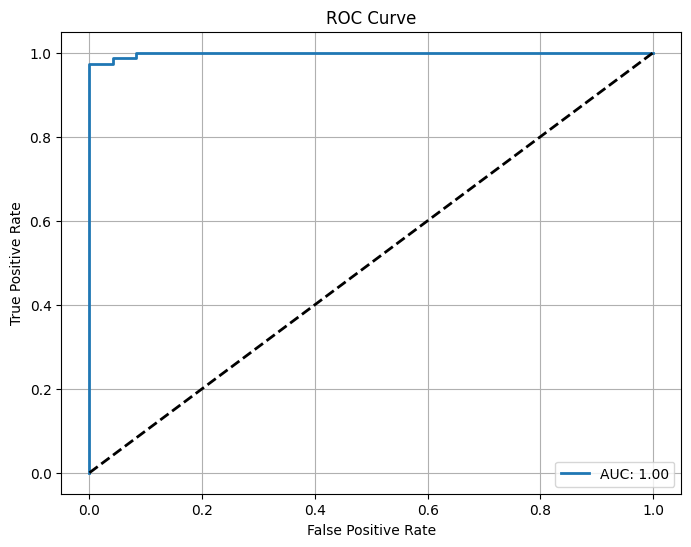

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_preds = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'AUC: {roc_auc_score(y_test, y_preds):.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Yes the results are predictive with an area under the curve of 1. Probabily too predictive, but YOLO.